<a href="https://colab.research.google.com/github/peela85/AIML/blob/master/M1_002_BatchGD_LRdecay_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Learning Objective

At the end of the experiment, you will be able to :

- Understand the concept of Gradient descent method
- Observe the effect of learning rate

In [0]:
#@title Experiment Walkthrough
#@markdown Gradient descent and learning rate variations
from IPython.display import HTML
HTML("""<video width='520' height='240' controls>
<source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Week_1/gradient_descent.mp4" type='video/mp4'>
</video>""")

##Dataset

###Description


The dataset consists of two columns and 89 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is  L∝T2 .


##AI/ML Technique

#### Gradient Descent

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks it’s parameters iteratively to minimize a given function to its local minimum.

To know more about Gradient Descent and its variants you can refer the below link:

https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0

## Keywords



- Gradient Descent
- Learning Rate
- Error Function
- Decay 

## Expected time : 60 mins

## Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902225" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9059040698" #@param {type:"string"}


In [9]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="M1W1_002_BatchGD_LRdecay_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Import the required Packages
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the data by using pandas read_csv()
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
# Print the first 5 rows of dataframe 'data'
print(data.head())
# Print the last 5 rows of dataframe 'data'
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [0]:
# Get the length and time period values from the dataset
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

#### Vanilla/Batch Gradient Descent

In [0]:
"""
The function 'train' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized error is returned.
"""
def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    
    #Calculate "delta_m" and "delta_c"
    #<YOUR CODE HERE>
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

"""
The function below trains the data for 1000 iterations. 
In each iteration it calls the 'train' function to get the updated values of m, c and error.
"""
def train_on_all(x, y, m, c, eta, iterations=1000):
    for steps in range(iterations):
        m, c, err = train(x, y, m, c, eta)
    return m, c, err

### Effect of varying LR on error and final line

Let us vary LR and find how the error decreases in each case, and how the final line looks, by training each case for the same number of iterations - 2000.

### $\eta$ = 0.1, 0.01, 0.001 and 0.0001 each for 2000 iterations figure out values of m, c. These values (i.e. m_1, m_01 etc c_1, c_01 etc) will be used in the cell below to plot.

In [0]:
m,c = 0,0

m_1, c_1, err_1 = train_on_all(l, tsq, m, c, 0.1, iterations=2000)
m_01, c_01, err_01 = train_on_all(l, tsq, m, c, 0.01, iterations=2000)
m_001, c_001, err_001 = train_on_all(l, tsq, m, c, 0.001, iterations=2000)
m_0001, c_0001, err_0001 = train_on_all(l, tsq, m, c, 0.0001, iterations=2000)

## Plot of lines vs $\eta$

In [0]:
# Find the lines
y_1 = m_1 * l + c_1
y_01 = m_01 * l + c_01
y_001 = m_001 * l + c_001
y_0001 = m_0001 * l + c_0001

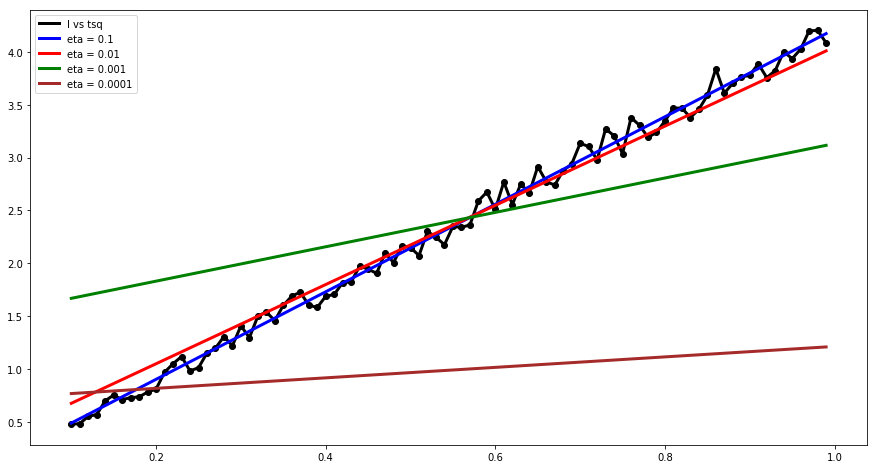

In [16]:
plt.figure(figsize=(15, 8))
#For all the lines above i.e. y_1, y_01, y_001, y_0001 plot them (in a different color) against the lines "l" 
#<YOUR CODE HERE>
plt.scatter(l, tsq, color='black')
plt.plot(l, tsq, color='black', linewidth=3)
plt.plot(l, y_1, color='blue', linewidth=3)
plt.plot(l, y_01, color='red', linewidth=3)
plt.plot(l, y_001, color='green', linewidth=3)
plt.plot(l, y_0001, color='brown', linewidth=3)

plt.legend(["l vs tsq","eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

Thus, we see that higher learning rates reach the best fit faster than lower learning rates (obviously).

## Plot of errors vs epochs for each $\eta$

In [0]:
epochs

In [0]:
m,c = 0,0

err_1 = []
err_01 = []
err_001 = []
err_0001 = []

for times in range(1000):
  m,c, err = train(l, tsq, m, c, 0.1)
  err_1.append(err)

for times in range(1000):
  m,c, err = train(l, tsq, m, c, 0.01)
  err_01.append(err)

for times in range(1000):
  m,c, err = train(l, tsq, m, c, 0.001)
  err_001.append(err)

for times in range(1000):
  m,c, err = train(l, tsq, m, c, 0.0001)
  err_0001.append(err)
 


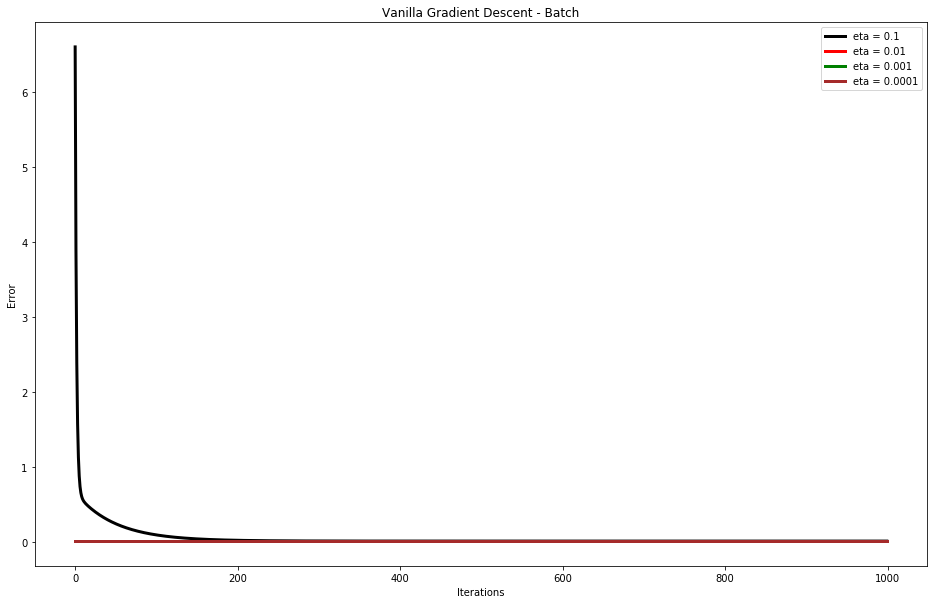

In [19]:
epochs = range(0,1000)
plt.figure(figsize=(16,10))
m,c = 0,0
err = 0.1
#plot "epochs" versus errs_1, errs_01, errs_02 (each in a different color)

plt.plot(epochs, err_1, color='black', linewidth=3)
plt.plot(epochs, err_01, color='red', linewidth=3)
plt.plot(epochs, err_001, color='green', linewidth=3)
plt.plot(epochs, err_0001, color='brown', linewidth=3)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Vanilla Gradient Descent - Batch")

plt.legend(["eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()


# With LR Decay

In some cases, the learning rate might be too high to give good fitting lines. For example, let us train with constant LR of 0.8 and get the final line after 1000 iterations:

### $\eta$ = 0.8

In [0]:
errs = []
m, c = 0, 0
eta = 0.8
# Call the train() method for 1000 iterations to update m and c and get error value with constant eta = 0.8.
for times in range(1000):
   #Call train function below
   m, c, error =  train(l, tsq, m,c, eta)
   #append to "errs" to append the errors for plotting later
   errs.append(error)

   
m_normal, c_normal = m, c

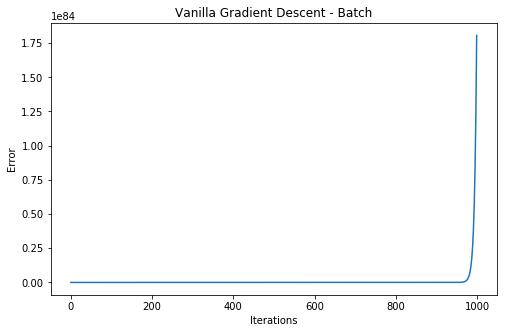

In [21]:
epochs = range(0, 1000)
plt.figure(figsize=(8,5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Vanilla Gradient Descent - Batch")
plt.show()

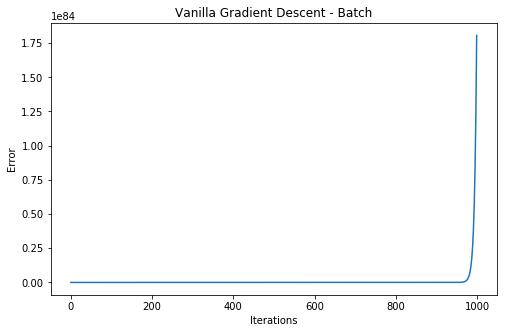

In [22]:
ms, cs,errs = [], [], []
m, c = 0, 0
eta = 0.8
# Call the train() method for 1000 iterations to update m and c and get error value with constant eta = 0.8.
for times in range(1000):
    #Call train function below
    m, c, error = train(l, tsq, m, c, eta) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epochs = range(0, 1000)
plt.figure(figsize=(8,5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Vanilla Gradient Descent - Batch")
plt.show()

#m, c, error = train_on_all(l, tsq, m, c, eta, iterations=1000)
m_normal, c_normal = m , c

In [23]:
m, c = 0, 0
eta = 0.8

m, c, error = train_on_all(l, tsq, m, c, eta, iterations=1000)
m_normal, c_normal = m , c

print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_normal, c_normal, errs[-1]))

m = -6.43359e+41 c = -1.1198e+42 Error = 1.80675e+84


Let us see the plot of error vs iterations:

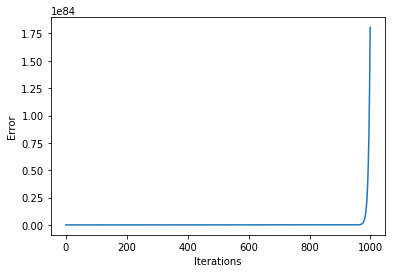

In [24]:
plt.plot(range(len(errs)), errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

We see that the error quickly goes to almost 0, but after some iterations blows up.

Let us check the "best fit" line that is found:

In [25]:
print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_normal, c_normal, errs[-1]))

m = -6.43359e+41 c = -1.1198e+42 Error = 1.80675e+84


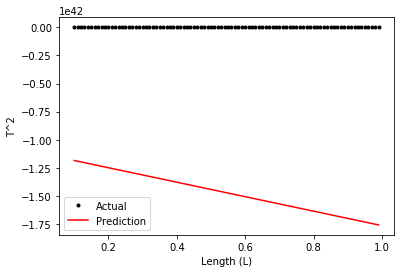

In [26]:
y = m_normal * l + c_normal 
plt.plot(l, tsq, '.k', label = 'Actual')
plt.plot(l,y,"r", label = 'Prediction')
plt.xlabel("Length (L)")
plt.ylabel("T^2")
plt.legend()
plt.show()

Clearly this is not ideal.

This was a simple case where we can see the learning rate is too high. There might be cases where it is not so simple to identify this. Also, having a low learning rate is not good because training time would be too high!

**Solution: Decay the learning rate.**

Now let us train another model with decaying lr. But let us not decay lr below 0.0001.

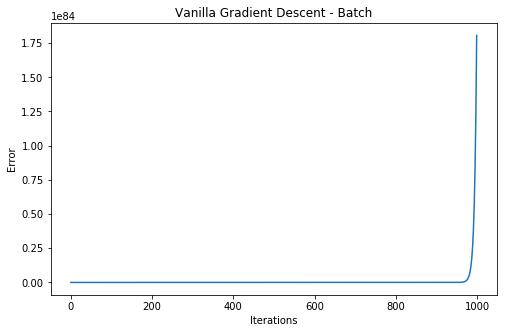

In [27]:
errs_decay = []
m, c = 0, 0
eta = 0.5
decay_factor = 0.99
# Call the train() method for 1000 iterations to update m and c and get error value with decaying eta.
for iteration in range(1000):
    eta = max(0.0001, eta * decay_factor)
    #Call train function below
    #for times in range(200):
    #Call train function below
    m, c, error = train_on_all(l, tsq, m, c, eta, iterations=100) # We will plot the value of for every 100 iterations
    errs_decay.append(error)
epochs = range(0,1000)
plt.figure(figsize=(8,5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Vanilla Gradient Descent - Batch")
plt.show()


m_decay, c_decay = m, c

In [28]:
print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_decay, c_decay, errs_decay[-1]))

m = 4.14148 c = 0.0735804 Error = 0.00706773


Let us see the plot of error vs iterations:

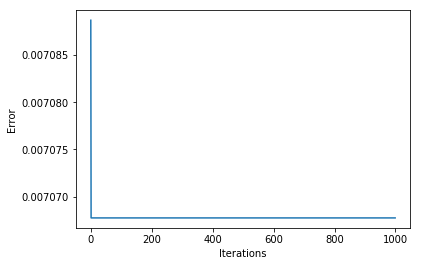

In [29]:
plt.plot(range(len(errs_decay)), errs_decay)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

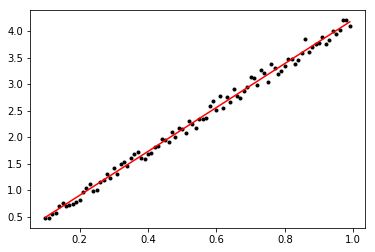

In [30]:
y = m_decay * l + c_decay 
plt.plot(l, tsq, '.k')
plt.plot(l,y,"r")
plt.show()

Thus, this is correct.

### Please answer the questions below to complete the experiment:

In [0]:
#@title Gradient descent always finds the global minima? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["True","False"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Difficult for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "None" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["Yes", "No"]

In [35]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 9226
Date of submission:  04 May 2019
Time of submission:  12:14:42
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
